In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/

In [ ]:
! pip install elevation

In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 
import pandas as pd

In [ ]:
dem_path = '/content/drive/My Drive/Image Segmentation/'
file_path = dem_path + "Firsoff_HiRISE_5_low_res.tif-adj.tif"
gdal_data = gdal.Open(file_path)

gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array=[]
data_array = gdal_band.ReadAsArray().astype(np.float)
# data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

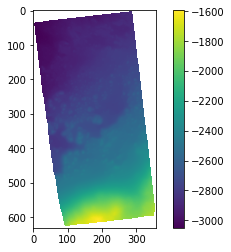

In [ ]:
plt.figure()
plt.imshow(data_array)
plt.colorbar()
plt.show()


In [ ]:
data_array_interp.max()

255

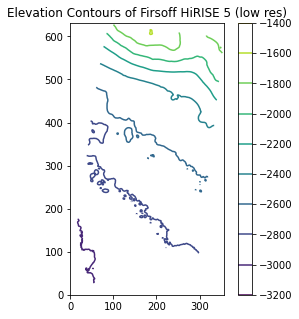

In [ ]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
plt.contour(data_array)
plt.title("Elevation Contours of Firsoff HiRISE 5 (low res)")
cbar = plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()

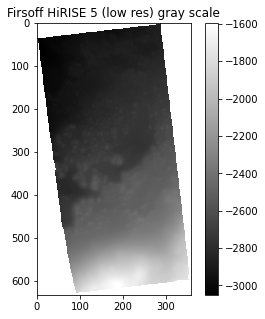

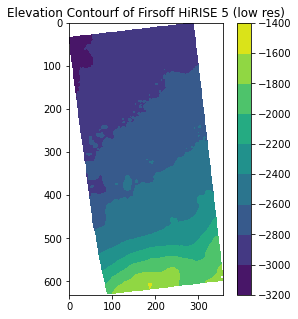

In [ ]:
#Plot image in grayscale
plt.figure(figsize=(5,5))
plt.imshow(data_array, cmap = 'gray')
plt.colorbar()
plt.title("Firsoff HiRISE 5 (low res) gray scale")
plt.show()


#Plot a contourf graph
plt.figure(figsize=(5,5))
plt.title("Elevation Contourf of Firsoff HiRISE 5 (low res)")
plt.contourf(data_array)
plt.colorbar()
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import os
import subprocess
from osgeo import gdal
import matplotlib.pyplot as plt

In [ ]:
dem = gdal.Open(file_path)
slp = gdal.DEMProcessing(dem_path + "slope.tif", dem, "slope", computeEdges=True) 

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7ff4d40b0c00> >

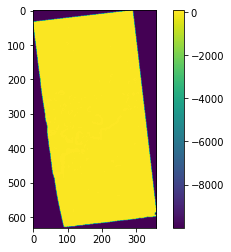

In [ ]:
slparray = slp.GetRasterBand(1).ReadAsArray()

plt.figure()
plt.imshow(slparray)
plt.colorbar()
plt.show()

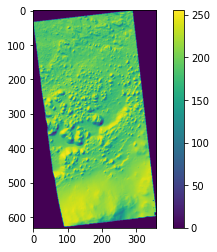

In [ ]:
# Creating a Hillshade
hillshade = gdal.DEMProcessing(dem_path + "hillshade1.tif", dem, "hillshade")
hillshade_array = hillshade.GetRasterBand(1).ReadAsArray()

plt.figure()
plt.imshow(hillshade_array)
plt.colorbar()
plt.show()


In [ ]:
!pip install richdem

     |████████████████████████████████| 4.5 MB 4.3 MB/s 


In [ ]:
import richdem as rd

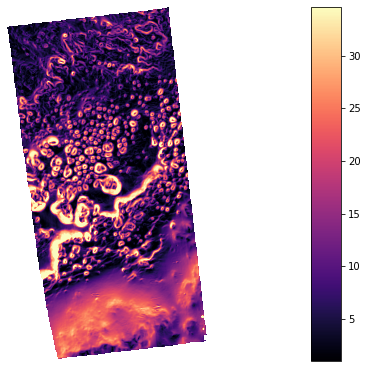

In [ ]:
rd_dem = rd.LoadGDAL(file_path)
rd_slope = rd.TerrainAttribute(rd_dem, attrib="slope_degrees")
rd.rdShow(rd_slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

# To save the result
# rd.SaveGDAL("rd_slope.tif", rd_slope)

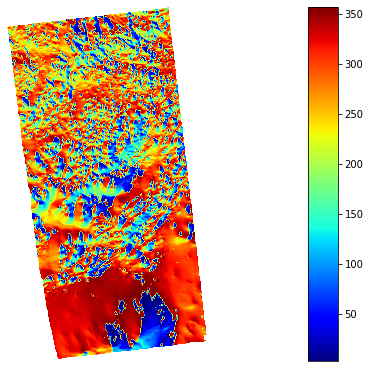

In [ ]:
aspect = rd.TerrainAttribute(rd_dem, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()

In [ ]:
dataset = gdal.Open(file_path)

In [ ]:
# Getting som info about our DEM
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                            dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Driver: GTiff/GeoTIFF
Size is 358 x 632 x 1
Projection is PROJCS["unnamed",GEOGCS["Geographic Coordinate System",DATUM["D_MARS",SPHEROID["MARS",3396190,0]],PRIMEM["Reference Meridian",0],UNIT["degree",0.0174532925199433]],PROJECTION["Equirectangular"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",0],PARAMETER["standard_parallel_1",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]
Origin = (-534141.0, 135873.0)
Pixel Size = (18.0, -18.0)


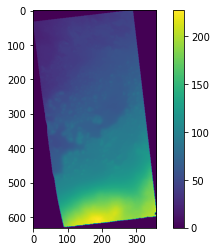

In [ ]:
data_array_interp = np.interp(data_array, (-3200.0, -1400), (0, 255)).astype(np.uint8)
plt.figure()
plt.imshow(data_array_interp)
plt.colorbar()
plt.show()

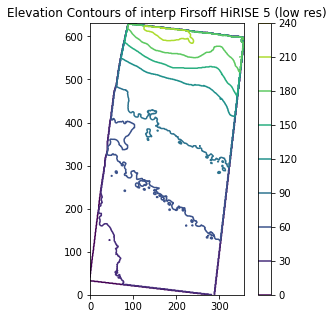

In [ ]:
#Plot out data with Matplotlib's 'contour' on data_array_interp
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)
plt.contour(data_array_interp)
plt.title("Elevation Contours of interp Firsoff HiRISE 5 (low res)")
cbar = plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()

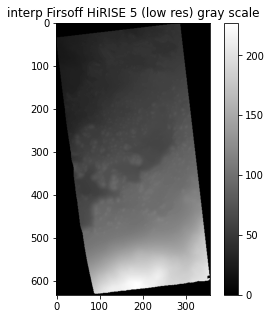

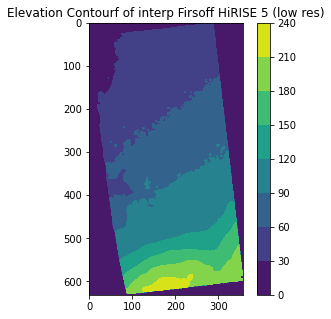

In [ ]:
#Plot image in grayscale on data_array_interp
plt.figure(figsize=(5,5))
plt.imshow(data_array_interp, cmap = 'gray')
plt.colorbar()
plt.title("interp Firsoff HiRISE 5 (low res) gray scale")
plt.show()


#Plot a contourf graph on data_array_interp
plt.figure(figsize=(5,5))
plt.title("Elevation Contourf of interp Firsoff HiRISE 5 (low res)")
plt.contourf(data_array_interp)
plt.colorbar()
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from scipy import ndimage

sx shape: (632, 358), sy shape (632, 358)
sx.max(): 255, sq_sx.max() 65025
sy.max(): 255, sq_sy.max() 65025


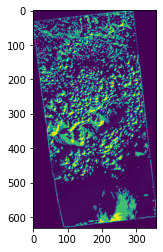

In [ ]:
# Get x-gradient in "sx"
sx = ndimage.sobel(data_array_interp,axis=0,mode='constant')
# Get y-gradient in "sy"
sy = ndimage.sobel(data_array_interp,axis=1,mode='constant')
# Get square root of sum of squares
# sobel=np.hypot(sx,sy)
print("sx shape: {}, sy shape {}".format(sx.shape, sy.shape))


sq_sx = np.asarray([np.power(sx[i][j], 2) for i in range(sx.shape[0]) for j in range(sx.shape[1])])
sq_sy = np.asarray([np.power(sy[i][j], 2) for i in range(sy.shape[0]) for j in range(sy.shape[1])])

print("sx.max(): {}, sq_sx.max() {}".format(sx.max(), sq_sx.max()))
print("sy.max(): {}, sq_sy.max() {}".format(sy.max(), sq_sy.max()))

slope_result = np.sqrt(sq_sx+sq_sy)
slope_result = np.reshape(slope_result, (632, 358))
# Hopefully see some edges

plt.imshow(slope_result)
plt.show()

In [ ]:

plt.figure()
plt.imshow(slparray)
plt.colorbar()
plt.show()

In [ ]:
# !pip install rasterio

In [ ]:
# import rasterio
# src = rasterio.open(file_path)
# src.colorinterp[0]
# profile = src.profile
# profile['photometric'] = "RGB"
# with rasterio.open(dem_path+"rgb.tif", 'w', **profile) as dst:
#   dst.write(src.read())

# from rasterio.enums import ColorInterp
# with rasterio.open(dem_path+"rgb.tif", 'r+', **profile) as src1:
#   src1.colorinterp = [ColorInterp.red, ColorInterp.green, ColorInterp.blue]

In [ ]:
# with rasterio.open(dem_path+"rgb.tif") as src2:
#   src2.colorinterp[0]

In [ ]:
# !pip install rasterio

In [ ]:
import numpy as np
import rasterio
from rasterio import Affine as A
from rasterio.warp import reproject, Resampling

with rasterio.Env():

    # As source: a 632 x 358 raster centered on 0 degrees E and 0
    # degrees N, each pixel covering 15".
    rows, cols = src_shape = (632, 358)
    d = 1.0/240 # decimal degrees per pixel
    # The following is equivalent to
    # A(d, 0, -cols*d/2, 0, -d, rows*d/2).
    src_transform = A.translation(-cols*d/2, rows*d/2) * A.scale(d, -d)
    src_crs = {'init': 'EPSG:4326'}
    source = np.ones(src_shape, np.uint8)*255

    # Destination: a 1024 x 1024 dataset in Web Mercator (EPSG:3857)
    # with origin at 0.0, 0.0.
    dst_shape = (1024, 1024)
    dst_transform = A.translation(-237481.5, 237536.4) * A.scale(425.0, -425.0)
    dst_crs = {'init': 'EPSG:3857'}
    destination = np.zeros(dst_shape, np.uint8)

    reproject(
        source,
        destination,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=dst_transform,
        dst_crs=dst_crs,
        resampling=Resampling.nearest)

    # Assert that the destination is only partly filled.
    assert destination.any()
    assert not destination.all()

In [ ]:
# import numpy as np
# import rasterio
# from rasterio.warp import calculate_default_transform, reproject, Resampling

# dst_crs = 'EPSG:9002'

# dem_path = '/content/drive/My Drive/Image Segmentation/'
# file_path = dem_path + "Firsoff_HiRISE_5_low_res.tif-adj.tif"




# with rasterio.open(file_path) as src:
#     transform, width, height = calculate_default_transform(
#         src.crs, dst_crs, src.width, src.height, *src.bounds)
#     kwargs = src.meta.copy()
#     kwargs.update({
#         'crs': dst_crs,
#         'transform': transform,
#         'width': width,
#         'height': height
#     })

#     with rasterio.open('raster_reproject.tif', 'w', **kwargs) as dst:
#         for i in range(1, src.count + 1):
#             reproject(
#                 source=rasterio.band(src, i),
#                 destination=rasterio.band(dst, i),
#                 src_transform=src.transform,
#                 src_crs=src.crs,
#                 dst_transform=transform,
#                 dst_crs=dst_crs,
#                 resampling=Resampling.nearest)